In [1]:
import pandas as pd

df=pd.read_csv('spam.csv',  encoding='ISO-8859-1')

In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df=df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [7]:
df.columns = ['label', 'text']

In [8]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


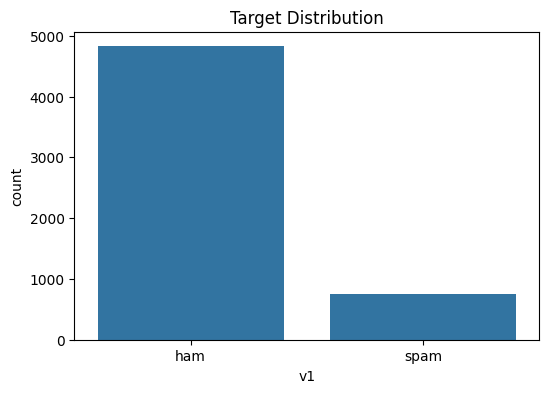

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('spam.csv', encoding='latin1')

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='v1')
plt.title('Target Distribution')
plt.show()


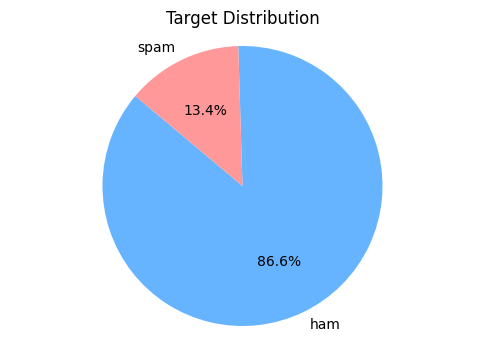

In [10]:
data = pd.read_csv('spam.csv', encoding='latin1')

v1 = data['v1'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(v1, labels=v1.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Target Distribution')
plt.axis('equal')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
X = df['text']
y = df['label']

df['label'] = df['label'].map({'ham': 1, 'spam': 0})

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vectorized, y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train the SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.96
              precision    recall  f1-score   support

         ham       0.98      0.93      0.95      1454
        spam       0.94      0.98      0.96      1441

    accuracy                           0.96      2895
   macro avg       0.96      0.96      0.96      2895
weighted avg       0.96      0.96      0.96      2895



In [16]:
import pickle
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm, model_file)

In [17]:
import pickle
with open('vectorize.pkl', 'wb') as model_file1:
    pickle.dump(vectorizer, model_file1)